# Inteligencia Artificial Aplicada al Análisis de Datos Biológicos

__Análisis de datos de expresión con algoritmos no supervisados__

_MeIA_

`2025`

## Biología de sistemas

<img src="../Imagen/ecolimodel.png" width="600" height="350"/>

<img src="../Imagen/network33.jpeg" width="700" height="400"/>

<img src="../Imagen/DownloadRNA.png" width="650" height="400"/>


<img src="../Imagen/WorkflowCo-exp.png" width="650" height="400"/>

In [1]:
# Importamos las librerías

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Cargamos los datos de expresión genética

dataset = pd.read_csv('../Datos/Tarea_unidad_2/genes150621sincontrol.txt', 
                      sep='\t', index_col=0)
dataset.head()

,AU565_BREAST,BT20_BREAST,BT474_BREAST,BT483_BREAST,BT549_BREAST,CAL120_BREAST,CAL148_BREAST,CAL51_BREAST,CAL851_BREAST,CAMA1_BREAST,...,MDAMB415_BREAST,MDAMB436_BREAST,MDAMB453_BREAST,MDAMB468_BREAST,SKBR3_BREAST,T47D_BREAST,UACC812_BREAST,UACC893_BREAST,ZR751_BREAST,ZR7530_BREAST
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.10,16.33,14.81,5.88,16.41,15.66,32.21,25.17,86.37,48.36,3.75,...,17.44,10.15,0.27,47.91,7.63,14.93,7.19,22.62,8.12,16.81
ENSG00000000005.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.12,0.00,0.00,0.00,0.00,0.00,0.00
ENSG00000000419.8,107.48,127.27,162.93,86.38,133.55,122.41,59.36,79.09,49.79,62.82,...,75.38,77.34,58.23,117.68,128.17,106.38,203.21,67.63,139.23,56.20
ENSG00000000457.9,10.32,6.65,15.37,12.03,3.59,1.93,7.63,8.79,2.42,9.46,...,3.00,6.57,12.99,7.79,8.82,5.42,3.65,18.09,15.96,13.76
ENSG00000000460.12,18.91,15.02,23.64,8.49,16.91,9.32,20.62,15.71,9.82,13.80,...,4.16,21.95,14.90,25.16,13.94,16.14,4.94,20.61,17.45,11.53


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57820 entries, ENSG00000000003.10 to ENSGR0000270726.1
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AU565_BREAST        57820 non-null  float64
 1   BT20_BREAST         57820 non-null  float64
 2   BT474_BREAST        57820 non-null  float64
 3   BT483_BREAST        57820 non-null  float64
 4   BT549_BREAST        57820 non-null  float64
 5   CAL120_BREAST       57820 non-null  float64
 6   CAL148_BREAST       57820 non-null  float64
 7   CAL51_BREAST        57820 non-null  float64
 8   CAL851_BREAST       57820 non-null  float64
 9   CAMA1_BREAST        57820 non-null  float64
 10  DU4475_BREAST       57820 non-null  float64
 11  EFM192A_BREAST      57820 non-null  float64
 12  EFM19_BREAST        57820 non-null  float64
 13  HCC1143_BREAST      57820 non-null  float64
 14  HCC1187_BREAST      57820 non-null  float64
 15  HCC1419_BREAST      57820 non

In [5]:
# Clasificación de líneas celulares
cell_lines = pd.read_csv("../Datos/Tarea_unidad_2/1.matrizbinariatiposBC221121.8.14pm.txt", sep="\t", index_col=0)
cell_lines.head()

,BasalA,BasalB,LuminalA,LuminalB,HER2ampl
Lineascelulares,,,,,
AU565_BREAST,0,0,0,0,1
BT20_BREAST,1,0,0,0,0
BT474_BREAST,0,0,0,1,0
BT483_BREAST,0,0,1,0,0
BT549_BREAST,0,1,0,0,0


In [6]:
# Agregamos una columna de subtipo a partir de la codificación one-hot
cell_lines['subtipo'] = cell_lines.idxmax(axis=1)
cell_lines

,BasalA,BasalB,LuminalA,LuminalB,HER2ampl,subtipo
Lineascelulares,,,,,,
AU565_BREAST,0,0,0,0,1,HER2ampl
BT20_BREAST,1,0,0,0,0,BasalA
BT474_BREAST,0,0,0,1,0,LuminalB
BT483_BREAST,0,0,1,0,0,LuminalA
BT549_BREAST,0,1,0,0,0,BasalB
CAL120_BREAST,0,1,0,0,0,BasalB
CAL148_BREAST,0,0,0,1,0,LuminalB
CAL51_BREAST,0,1,0,0,0,BasalB
CAL851_BREAST,1,0,0,0,0,BasalA


In [6]:
# Verificar correspondencia entre los datos
dataset.columns = dataset.columns.str.upper()  # igualar mayúsculas si es necesario
dataset = dataset[cell_lines.index]  # reordenar columnas por nombre de muestra

In [7]:
dataset

,AU565_BREAST,BT20_BREAST,BT474_BREAST,BT483_BREAST,BT549_BREAST,CAL120_BREAST,CAL148_BREAST,CAL51_BREAST,CAL851_BREAST,CAMA1_BREAST,...,MDAMB415_BREAST,MDAMB436_BREAST,MDAMB453_BREAST,SKBR3_BREAST,T47D_BREAST,UACC812_BREAST,UACC893_BREAST,ZR751_BREAST,ZR7530_BREAST,MDAMB468_BREAST
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.10,16.33,14.81,5.88,16.41,15.66,32.21,25.17,86.37,48.36,3.75,...,17.44,10.15,0.27,7.63,14.93,7.19,22.62,8.12,16.81,47.91
ENSG00000000005.5,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.12
ENSG00000000419.8,107.48,127.27,162.93,86.38,133.55,122.41,59.36,79.09,49.79,62.82,...,75.38,77.34,58.23,128.17,106.38,203.21,67.63,139.23,56.20,117.68
ENSG00000000457.9,10.32,6.65,15.37,12.03,3.59,1.93,7.63,8.79,2.42,9.46,...,3.00,6.57,12.99,8.82,5.42,3.65,18.09,15.96,13.76,7.79
ENSG00000000460.12,18.91,15.02,23.64,8.49,16.91,9.32,20.62,15.71,9.82,13.80,...,4.16,21.95,14.90,13.94,16.14,4.94,20.61,17.45,11.53,25.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSGR0000264819.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSGR0000265350.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
ENSGR0000265658.1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [8]:
# Como es un conjunto de datos muy grande, muchos de los genes contenidos en el dataset tienen poca
# variabilidad.
# Calcular la varianza de cada gen y quedarnos con los más variables
variances = dataset.var(axis=1)
expr_filtered = dataset.loc[variances.sort_values(ascending=False).index[:2000]]  # por ejemplo, top 5000 genes

In [9]:
expr_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2000 entries, ENSG00000228253.1 to ENSG00000145623.8
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   AU565_BREAST        2000 non-null   float64
 1   BT20_BREAST         2000 non-null   float64
 2   BT474_BREAST        2000 non-null   float64
 3   BT483_BREAST        2000 non-null   float64
 4   BT549_BREAST        2000 non-null   float64
 5   CAL120_BREAST       2000 non-null   float64
 6   CAL148_BREAST       2000 non-null   float64
 7   CAL51_BREAST        2000 non-null   float64
 8   CAL851_BREAST       2000 non-null   float64
 9   CAMA1_BREAST        2000 non-null   float64
 10  DU4475_BREAST       2000 non-null   float64
 11  EFM19_BREAST        2000 non-null   float64
 12  EFM192A_BREAST      2000 non-null   float64
 13  HCC1143_BREAST      2000 non-null   float64
 14  HCC1187_BREAST      2000 non-null   float64
 15  HCC1419_BREAST      2000 non-nu

In [10]:
# Matriz de correlación de Pearson entre genes
corr_matrix = expr_filtered.T.corr(method='pearson')  # transpuesta: genes x muestras
corr_matrix.head()

gene_id,ENSG00000228253.1,ENSG00000198712.1,ENSG00000198804.2,ENSG00000198938.2,ENSG00000210082.2,ENSG00000110484.6,ENSG00000198899.2,ENSG00000108298.5,ENSG00000212907.2,ENSG00000198840.2,...,ENSG00000168000.10,ENSG00000137563.7,ENSG00000163956.6,ENSG00000171940.9,ENSG00000105568.13,ENSG00000141543.5,ENSG00000139629.11,ENSG00000123136.10,ENSG00000167767.9,ENSG00000145623.8
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000228253.1,1.000000,0.803535,0.715923,0.729618,0.444316,0.083368,0.873167,0.036295,0.851827,0.716633,...,0.023544,-0.347617,-0.159053,0.053830,-0.031782,-0.154176,0.065424,-0.309737,-0.183852,-0.209502
ENSG00000198712.1,0.803535,1.000000,0.740793,0.811756,0.457426,-0.005043,0.816519,0.102135,0.825263,0.597031,...,-0.028908,-0.297630,-0.107053,-0.044044,-0.106358,-0.217554,0.082526,-0.369083,-0.118374,-0.136722
ENSG00000198804.2,0.715923,0.740793,1.000000,0.896329,0.590938,0.173828,0.763674,0.094249,0.746886,0.512313,...,-0.104225,-0.206711,-0.139886,-0.125345,-0.118458,-0.281475,-0.038936,-0.419432,-0.132122,-0.109791
ENSG00000198938.2,0.729618,0.811756,0.896329,1.000000,0.590033,0.173539,0.784384,-0.046546,0.754361,0.582107,...,0.019754,-0.162635,-0.112979,-0.161585,-0.181866,-0.290197,-0.041449,-0.327368,-0.170216,-0.101106
ENSG00000210082.2,0.444316,0.457426,0.590938,0.590033,1.000000,0.017023,0.362343,-0.120290,0.462939,0.247147,...,-0.122596,-0.011987,-0.170868,-0.300557,-0.274635,-0.280170,-0.174803,-0.202900,-0.146448,0.090045


In [11]:
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

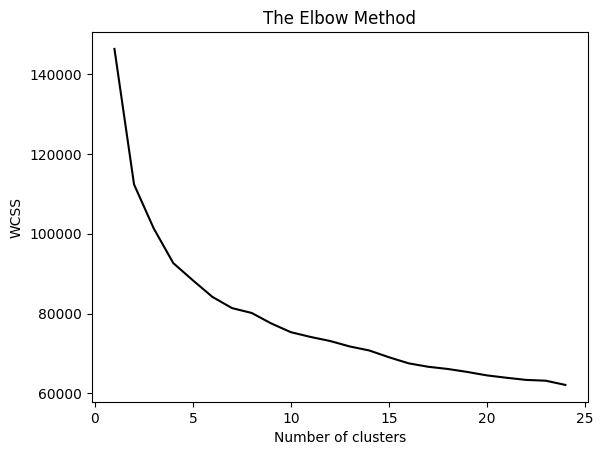

In [12]:
# Podemos intentar determinar un número óptimo de clusters 
wcss = []
for i in range(1, 25):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 150)
    kmeans.fit(corr_matrix)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 25), wcss,color='k')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [13]:
# Se entrena Kmeans con 15 cluster
kmeans = KMeans(n_clusters=15, random_state=42).fit(corr_matrix)

# Se obtienen las etiquetas para cada gen
clusters = kmeans.labels_

In [14]:
# Asignar módulo a cada gen
gene_modules = pd.DataFrame({'gene': corr_matrix.index, 'module': clusters})

In [15]:
gene_modules

,gene,module
0,ENSG00000228253.1,4
1,ENSG00000198712.1,4
2,ENSG00000198804.2,4
3,ENSG00000198938.2,4
4,ENSG00000210082.2,3
...,...,...
1995,ENSG00000141543.5,5
1996,ENSG00000139629.11,12
1997,ENSG00000123136.10,5
1998,ENSG00000167767.9,5


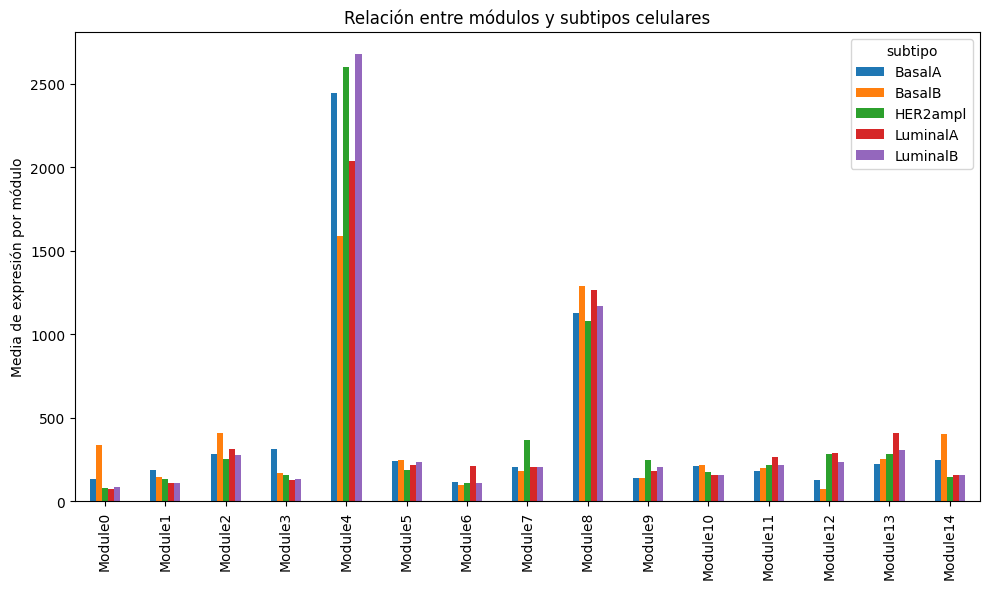

In [16]:
# Calcular "eigengene" como promedio de expresión por módulo
module_eigengenes = {}

for mod in sorted(gene_modules['module'].unique()):
    genes_in_mod = gene_modules[gene_modules['module'] == mod]['gene']
    module_expr = expr_filtered.loc[genes_in_mod]
    module_eigengenes[f'Module{mod}'] = module_expr.mean(axis=0)

eigengenes_df = pd.DataFrame(module_eigengenes)

# Unir con subtipo
eigengenes_df['subtipo'] = cell_lines['subtipo']

# Analizar relación con subtipo
module_means = eigengenes_df.groupby('subtipo').mean()
module_means.T.plot(kind='bar', figsize=(10, 6))
plt.ylabel("Media de expresión por módulo")
plt.title("Relación entre módulos y subtipos celulares")
plt.tight_layout()
plt.show()

In [17]:
# Calculamos eigengenes con PCA 
# Para cada modulo solo extraemos el primer componente principal

from sklearn.decomposition import PCA

# Preparar un DataFrame para guardar los eigengenes
module_eigengenes = pd.DataFrame(index=dataset.columns)  # muestras como índice

for mod in np.unique(clusters):
    genes_in_module = gene_modules[gene_modules['module'] == mod]['gene']
    expr_module = expr_filtered.loc[genes_in_module].T  # genes x muestras → muestras x genes
    pca = PCA(n_components=1)
    eigengene = pca.fit_transform(expr_module)[:, 0]  # primer componente
    module_eigengenes[f'Module_{mod}'] = eigengene

# Renombrar para parecerse las muestras
module_eigengenes.index.name = 'Muestra'
module_eigengenes.head()

,Module_0,Module_1,Module_2,Module_3,Module_4,Module_5,Module_6,Module_7,Module_8,Module_9,Module_10,Module_11,Module_12,Module_13,Module_14
Muestra,,,,,,,,,,,,,,,
AU565_BREAST,-1335.039304,118.000524,-210.927350,-5862.417492,-24852.939981,-1447.200085,-226.394051,20147.942401,4403.051885,-535.099270,341.772508,-767.234457,1104.541096,633.737503,-2830.679113
BT20_BREAST,-424.425836,-288.180537,319.275231,-2481.408827,-7542.314312,119.891971,-218.610744,-2611.982095,-5279.313658,-463.523897,1722.266253,-848.079454,915.751512,-2385.036065,-2275.070089
BT474_BREAST,-1647.617352,-478.045789,-1352.835190,1093.971350,15456.868459,1113.560463,-374.043361,17074.170429,-3688.902396,10156.637730,-56.366033,-392.311695,705.013133,-956.579013,684.863715
BT483_BREAST,-1346.187825,-176.250894,-3127.887053,-1767.683846,23989.663272,786.426826,-196.652058,-2949.323777,-8879.290271,-814.806224,-556.324406,738.522636,6340.330908,-589.655732,-951.460730
BT549_BREAST,2905.744897,-35.823077,5573.158146,339.992578,-26059.664456,2854.163100,-289.251510,-2640.185035,-85.674483,-685.199771,832.258639,-701.514940,-3103.186098,-1556.174339,5458.708564


In [18]:
traits = cell_lines.drop(columns='subtipo')  # Para hacer la asociación solo utilizamos columnas one-hot

In [19]:
traits = traits.loc[module_eigengenes.index] # aseguramos que las muestras esten en el mismo orden

In [20]:
# Correlacion módulo-subtipo (Pearson)

from scipy.stats import pearsonr

moduleTraitCor = pd.DataFrame(index=module_eigengenes.columns, columns=traits.columns)
moduleTraitPvalue = pd.DataFrame(index=module_eigengenes.columns, columns=traits.columns)

#Calculamos la correlacion de Pearson entre cada módlo y cada subtipo
# Guardamos el valor de la correlación y el p-value asociado.
for mod in module_eigengenes.columns:
    for subtype in traits.columns:
        r, p = pearsonr(module_eigengenes[mod], traits[subtype])
        moduleTraitCor.loc[mod, subtype] = r
        moduleTraitPvalue.loc[mod, subtype] = p

moduleTraitCor = moduleTraitCor.astype(float)
moduleTraitPvalue = moduleTraitPvalue.astype(float)


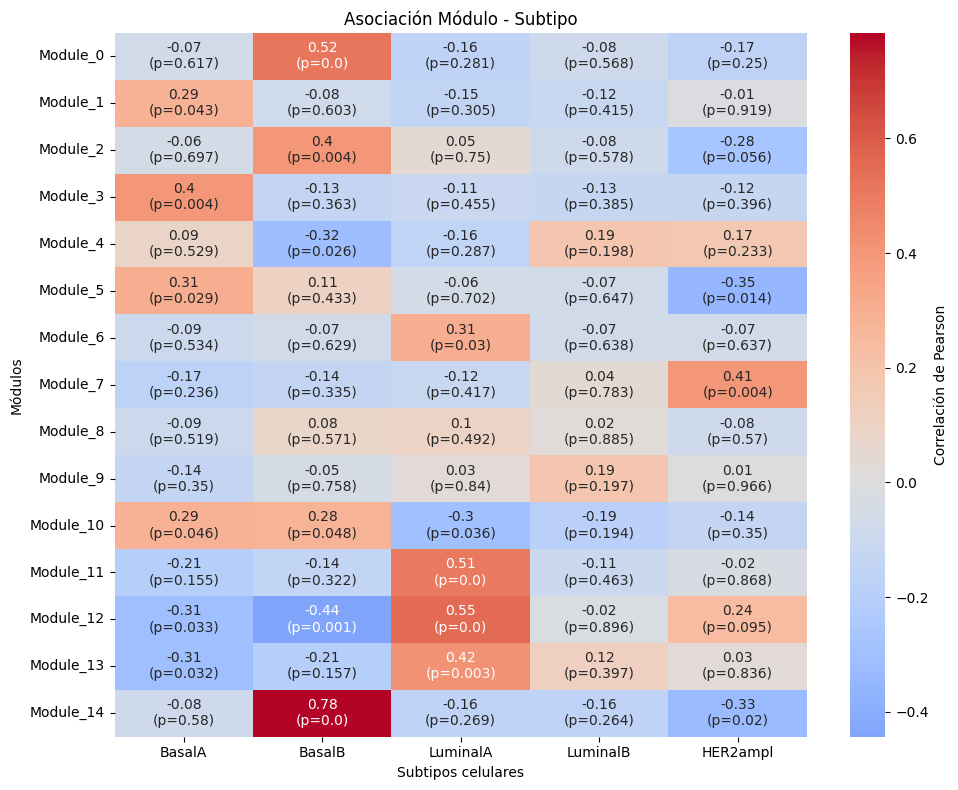

In [21]:
# Heatmap de asociacion entre módlo -subtipo
import seaborn as sns
import matplotlib.pyplot as plt

annot = moduleTraitCor.round(2).astype(str) + "\n(p=" + moduleTraitPvalue.round(3).astype(str) + ")"

plt.figure(figsize=(10, 8))
sns.heatmap(moduleTraitCor, annot=annot, fmt='', cmap='coolwarm', center=0, cbar_kws={'label': 'Correlación de Pearson'})
plt.title('Asociación Módulo - Subtipo')
plt.xlabel('Subtipos celulares')
plt.ylabel('Módulos')
plt.tight_layout()
plt.show()

In [22]:
import networkx as nx

In [23]:
# 1. Extraer genes del módulo 2
genes_mod2 = gene_modules[gene_modules['module'] == 14]['gene']

# 2. Obtener la submatriz de correlación entre esos genes
corr_mod2 = corr_matrix.loc[genes_mod2, genes_mod2]

# 3. Filtrar el 50% superior de las correlaciones (sin contar la diagonal)
# Convertir a una matriz de pares (sin duplicados)
corr_values = corr_mod2.where(np.triu(np.ones(corr_mod2.shape), k=1).astype(bool)).stack()

# Obtener el umbral del 50% más alto
threshold = corr_values.quantile(0.9)

# Filtrar los pares de genes cuya correlación sea mayor al umbral
edges = corr_values[corr_values > threshold]

# 4. Crear la red con networkx
G = nx.Graph()
G.add_nodes_from(genes_mod2)

# Añadir las aristas con el valor de correlación como peso
for (gene1, gene2), weight in edges.items():
    G.add_edge(gene1, gene2, weight=weight)

print(f"Nodos en la red: {G.number_of_nodes()}")
print(f"Aristas en la red (top 50%): {G.number_of_edges()}")

Nodos en la red: 176
Aristas en la red (top 50%): 1540


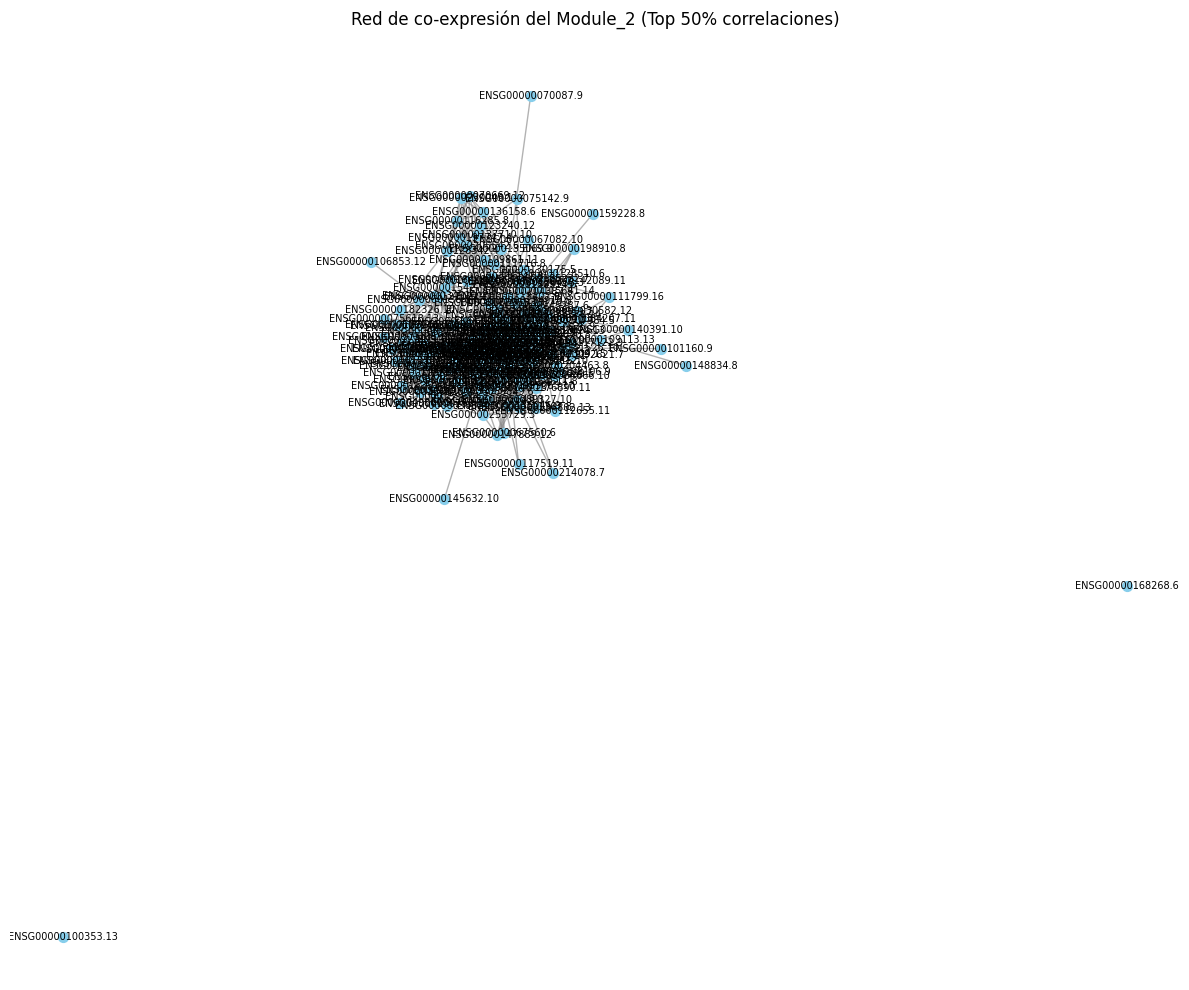

In [24]:
# 5. Dibujar la red
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, seed=42)  # diseño reproducible
edges_weights = [G[u][v]['weight'] for u, v in G.edges]

nx.draw_networkx_nodes(G, pos, node_size=50, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=1, edge_color='gray', alpha=0.6)
nx.draw_networkx_labels(G, pos, font_size=7, font_color='black')

plt.title("Red de co-expresión del Module_2 (Top 50% correlaciones)")
plt.axis('off')
plt.tight_layout()
plt.show()